## Assignment Credit Scoring
### Credit scorecard
#### Marie Reine Obama
#### May 2021

### 1. Introduction

In this project, the objective is to develop an application credit scorecard with the use of two datasets containing information about the application for loans to subprime customers: 

- datasets on accepted applicants
- datasets on rejected applicants

To create our credit scorecard model, we will preprocess the data, fit differents models, and test their performance to predict the risk of default using the accepted dataset. Then, the rejected dataset wil enable the model selction to get the probability of default over our set of clients, and to create a new predictive model.

### 2. Data Preparation 

In [1]:
# Loading requiered libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from category_encoders import *
from sklearn.model_selection import train_test_split

In [2]:
# Reading the accept dataset
accepts = pd.read_excel("ACCEPTS.xlsx")

In [3]:
accepts.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,Has_FICO,Business_channel,Days_late,FICO_Score,Loan_amount,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio,Default_45
0,250263,1,1,11,5,6,7,1,2,0,1,0,NaN,1.438518,-0.259085,1.781040,0.860269,0.513980,0
1,250290,1,2,6,4,5,1,1,2,1,1,0,1.498183,0.204811,0.383312,1.107163,-0.718249,1.796590,0
2,250249,2,3,11,5,7,7,1,2,1,1,0,-0.241731,-0.852651,-0.732430,1.406664,1.122930,-0.768631,0
3,249516,3,3,10,4,2,4,1,2,0,1,168,NaN,-0.676407,-0.057350,0.957412,-1.702482,0.513980,1
4,249827,1,3,5,2,4,4,1,3,0,1,0,NaN,-0.412042,-0.574648,-0.390342,0.910077,-0.768631,0


Let's check the missing values

In [4]:
accepts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   V1                   10000 non-null  int64  
 2   V2                   10000 non-null  int64  
 3   V3                   10000 non-null  int64  
 4   V4                   10000 non-null  int64  
 5   V5                   10000 non-null  int64  
 6   V6                   10000 non-null  int64  
 7   V7                   10000 non-null  int64  
 8   V8                   10000 non-null  object 
 9   Has_FICO             10000 non-null  int64  
 10  Business_channel     10000 non-null  int64  
 11  Days_late            10000 non-null  int64  
 12  FICO_Score           5528 non-null   float64
 13  Loan_amount          10000 non-null  float64
 14  Monthly_income       10000 non-null  float64
 15  Age                  10000 non-null  

In [5]:
# Columns with missing values
missing_col = accepts.columns[accepts.isnull().any()]
missing_col

Index(['FICO_Score'], dtype='object')

In [6]:
# Number of observations with FICO_Score indicated in the 'Has_FICO' variable
sum(accepts["Has_FICO"]==0)

4472

In [7]:
# Total missing values in the 'FICO_Score' variable
sum(accepts["FICO_Score"].isnull())

4472

We assume that missing values in the "FICO_Score" variable mean that the company does not have this information on the cients related. Since there is no available information on that, we deem relevant to replace missing values in this cas by zero.

In [8]:
accepts['FICO_Score'].fillna(0, inplace = True)

Let's explore numerical variables to see if we have outliers.

In [9]:
accepts.describe()

,ID,V1,V2,V3,V4,V5,V6,V7,Has_FICO,Business_channel,Days_late,FICO_Score,Loan_amount,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio,Default_45
count,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,282247.99760,1.878700,3.49540,9.041400,3.316200,3.97740,4.868300,1.757200,0.552800,1.403200,56.459200,-0.046024,0.034164,-0.119329,-0.003147,0.100456,0.019662,0.236400
std,15871.15137,1.092385,1.20877,3.723207,1.361618,2.03664,1.378675,0.958927,0.497229,0.655342,117.216568,0.757085,1.050937,1.020399,1.019526,0.971090,1.015233,0.424892
min,249516.00000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000,-6.033156,-1.117017,-0.984880,-1.588346,-2.859551,-0.768631,0.000000
25%,269470.25000,1.000000,3.00000,7.000000,2.000000,2.00000,4.000000,1.000000,0.000000,1.000000,0.000000,-0.328726,-0.641159,-0.536330,-0.914469,-0.614537,-0.768631,0.000000
50%,284845.00000,1.000000,3.00000,10.000000,4.000000,4.00000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-0.323920,-0.359389,-0.165717,0.414129,-0.768631,0.000000
75%,296044.75000,3.000000,5.00000,11.000000,4.000000,6.00000,5.000000,3.000000,1.000000,2.000000,15.000000,0.000000,0.381055,0.056479,0.882537,0.965099,0.513980,0.000000
max,305957.00000,5.000000,6.00000,16.000000,6.000000,7.00000,7.000000,3.000000,1.000000,3.000000,623.000000,2.467563,5.844611,43.842002,2.005666,9.387304,1.796590,1.000000


In the previous result, it seems that we do not have outliers.

Check the number of unique values to determine how to process each variable (categorical or numerical).

In [12]:
unique_values = pd.DataFrame(columns=["variables","nbr_unique_values"])

for i in accepts.columns:
    nbr_variables = len(accepts[i].value_counts())
    unique_values = unique_values.append({"variables": str(i), "nbr_unique_values":nbr_variables},ignore_index=True)
    
unique_values

,variables,nbr_unique_values
0,ID,10000
1,V1,5
2,V2,6
3,V3,16
4,V4,6
5,V5,7
6,V6,7
7,V7,3
8,V8,5
9,Has_FICO,2


From the results above, we can see that there are 10.000 observations and the majority of variables do not have a lot of unique values.

Prior to dealing with categorical variables , we split the dataset into train and test. The train is used to fit the models and the test set to evaluate the performance of the different models.

In [14]:
# We define X (predictive variables) and y (dependent variable). We drop the variable 'Days_late'

X = accepts.drop(['Default_45','Days_late'], axis=1)

y = accepts[["Default_45"]].reset_index(drop=True)

In [15]:
# We split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123, stratify=y)

I will use the 20% of the test set for compare the models.

In [16]:
# We split into valid and test datasets
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=.5, random_state=234, stratify=y_test)

#### WOE Transformation

For categorizing the variable I will calculate the weight of evidence (WOE) over the training dataset. Using this metric to build the predictive model has two important benefits:

* It helps to build a strict linear relationship with log-odds used in logistic regression
* It also handles categorical value so no need for dummy variables, in this case, this benefit is very helpful because all variables will be treated as categorical

The WOE method attempts to find a monotonic relationship between the predictive features and the target variable (Default) by splitting each feature into bins and assigning a weight to each bin.

In [17]:
# Throught these functions, we group the variables in bins and calculate the WOE for each group and the IV for each variable

# reference: https://github.com/Sundar0989/WOE-and-IV/blob/master/WOE_IV.ipynb 

# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [18]:
# We apply the WOE and IV in the train set
X_train_pre = X_train.drop('ID', axis=1)
final_iv, IV = data_vars(X_train_pre,y_train.Default_45)

We can see how the WOE is applied in the train set and the different groups of variables. 

If we take the variable V1 for instance, we can see that it is grouped into the groups [1] and [2,5]. The first group has a WOE of -0.3035 and the second group has a WOE of 0.3557.

In [19]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,V1,1,1,3490,649,0.185960,2841,0.814040,0.457687,0.620035,-0.303591,0.107045
1,V1,2,5,2510,769,0.306375,1741,0.693625,0.542313,0.379965,0.355764,0.107045
2,V2,1,3,3119,724,0.232126,2395,0.767874,0.510578,0.522698,-0.023459,0.000588
3,V2,4,6,2881,694,0.240889,2187,0.759111,0.489422,0.477302,0.025074,0.000588
4,V3,1,10,3199,861,0.269147,2338,0.730853,0.607193,0.510258,0.173932,0.038240
5,V3,11,15,2801,557,0.198858,2244,0.801142,0.392807,0.489742,-0.220562,0.038240
6,V4,1,4,4746,1266,0.266751,3480,0.733249,0.892807,0.759494,0.161718,0.129291
7,V4,5,6,1254,152,0.121212,1102,0.878788,0.107193,0.240506,-0.808113,0.129291
8,V5,1,2,1842,685,0.371878,1157,0.628122,0.483075,0.252510,0.648721,0.297491
9,V5,3,4,1944,432,0.222222,1512,0.777778,0.304654,0.329987,-0.079875,0.297491


In [20]:
# Applying the WOE in the X_train, X_valid and X_test datasets
transform_vars_list = X_train.columns.difference(['ID'])
transform_prefix = 'new_' 

In [21]:
# reference: https://github.com/Sundar0989/WOE-and-IV/blob/master/WOE_IV.ipynb 
def transf(df):
    for var in transform_vars_list:
        small_df = final_iv[final_iv['VAR_NAME'] == var]
        transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
        replace_cmd = ''
        replace_cmd1 = ''
        for i in sorted(transform_dict.items()):
            replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
            replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
        replace_cmd = replace_cmd + '0'
        replace_cmd1 = replace_cmd1 + '0'
        if replace_cmd != '0':
            try:
                df[transform_prefix + var] = df[var].apply(lambda x: eval(replace_cmd))
            except:
                df[transform_prefix + var] = df[var].apply(lambda x: eval(replace_cmd1))
    return df

In [22]:
X_train_woe = transf(X_train)
X_valid_woe = transf(X_valid)
X_test_woe = transf(X_test)

<ipython-input-21-cdac07671526>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[transform_prefix + var] = df[var].apply(lambda x: eval(replace_cmd))
<ipython-input-21-cdac07671526>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[transform_prefix + var] = df[var].apply(lambda x: eval(replace_cmd1))


In [23]:
# We keep only the variables with the WOE value
X_train_woe = X_train_woe.loc[:, X_train_woe.columns.str.contains('new')]
X_valid_woe = X_valid_woe.loc[:, X_valid_woe.columns.str.contains('new')]
X_test_woe = X_test_woe.loc[:, X_test_woe.columns.str.contains('new')]

Let's plot the WOE values of our predictive features with their respective bins. 

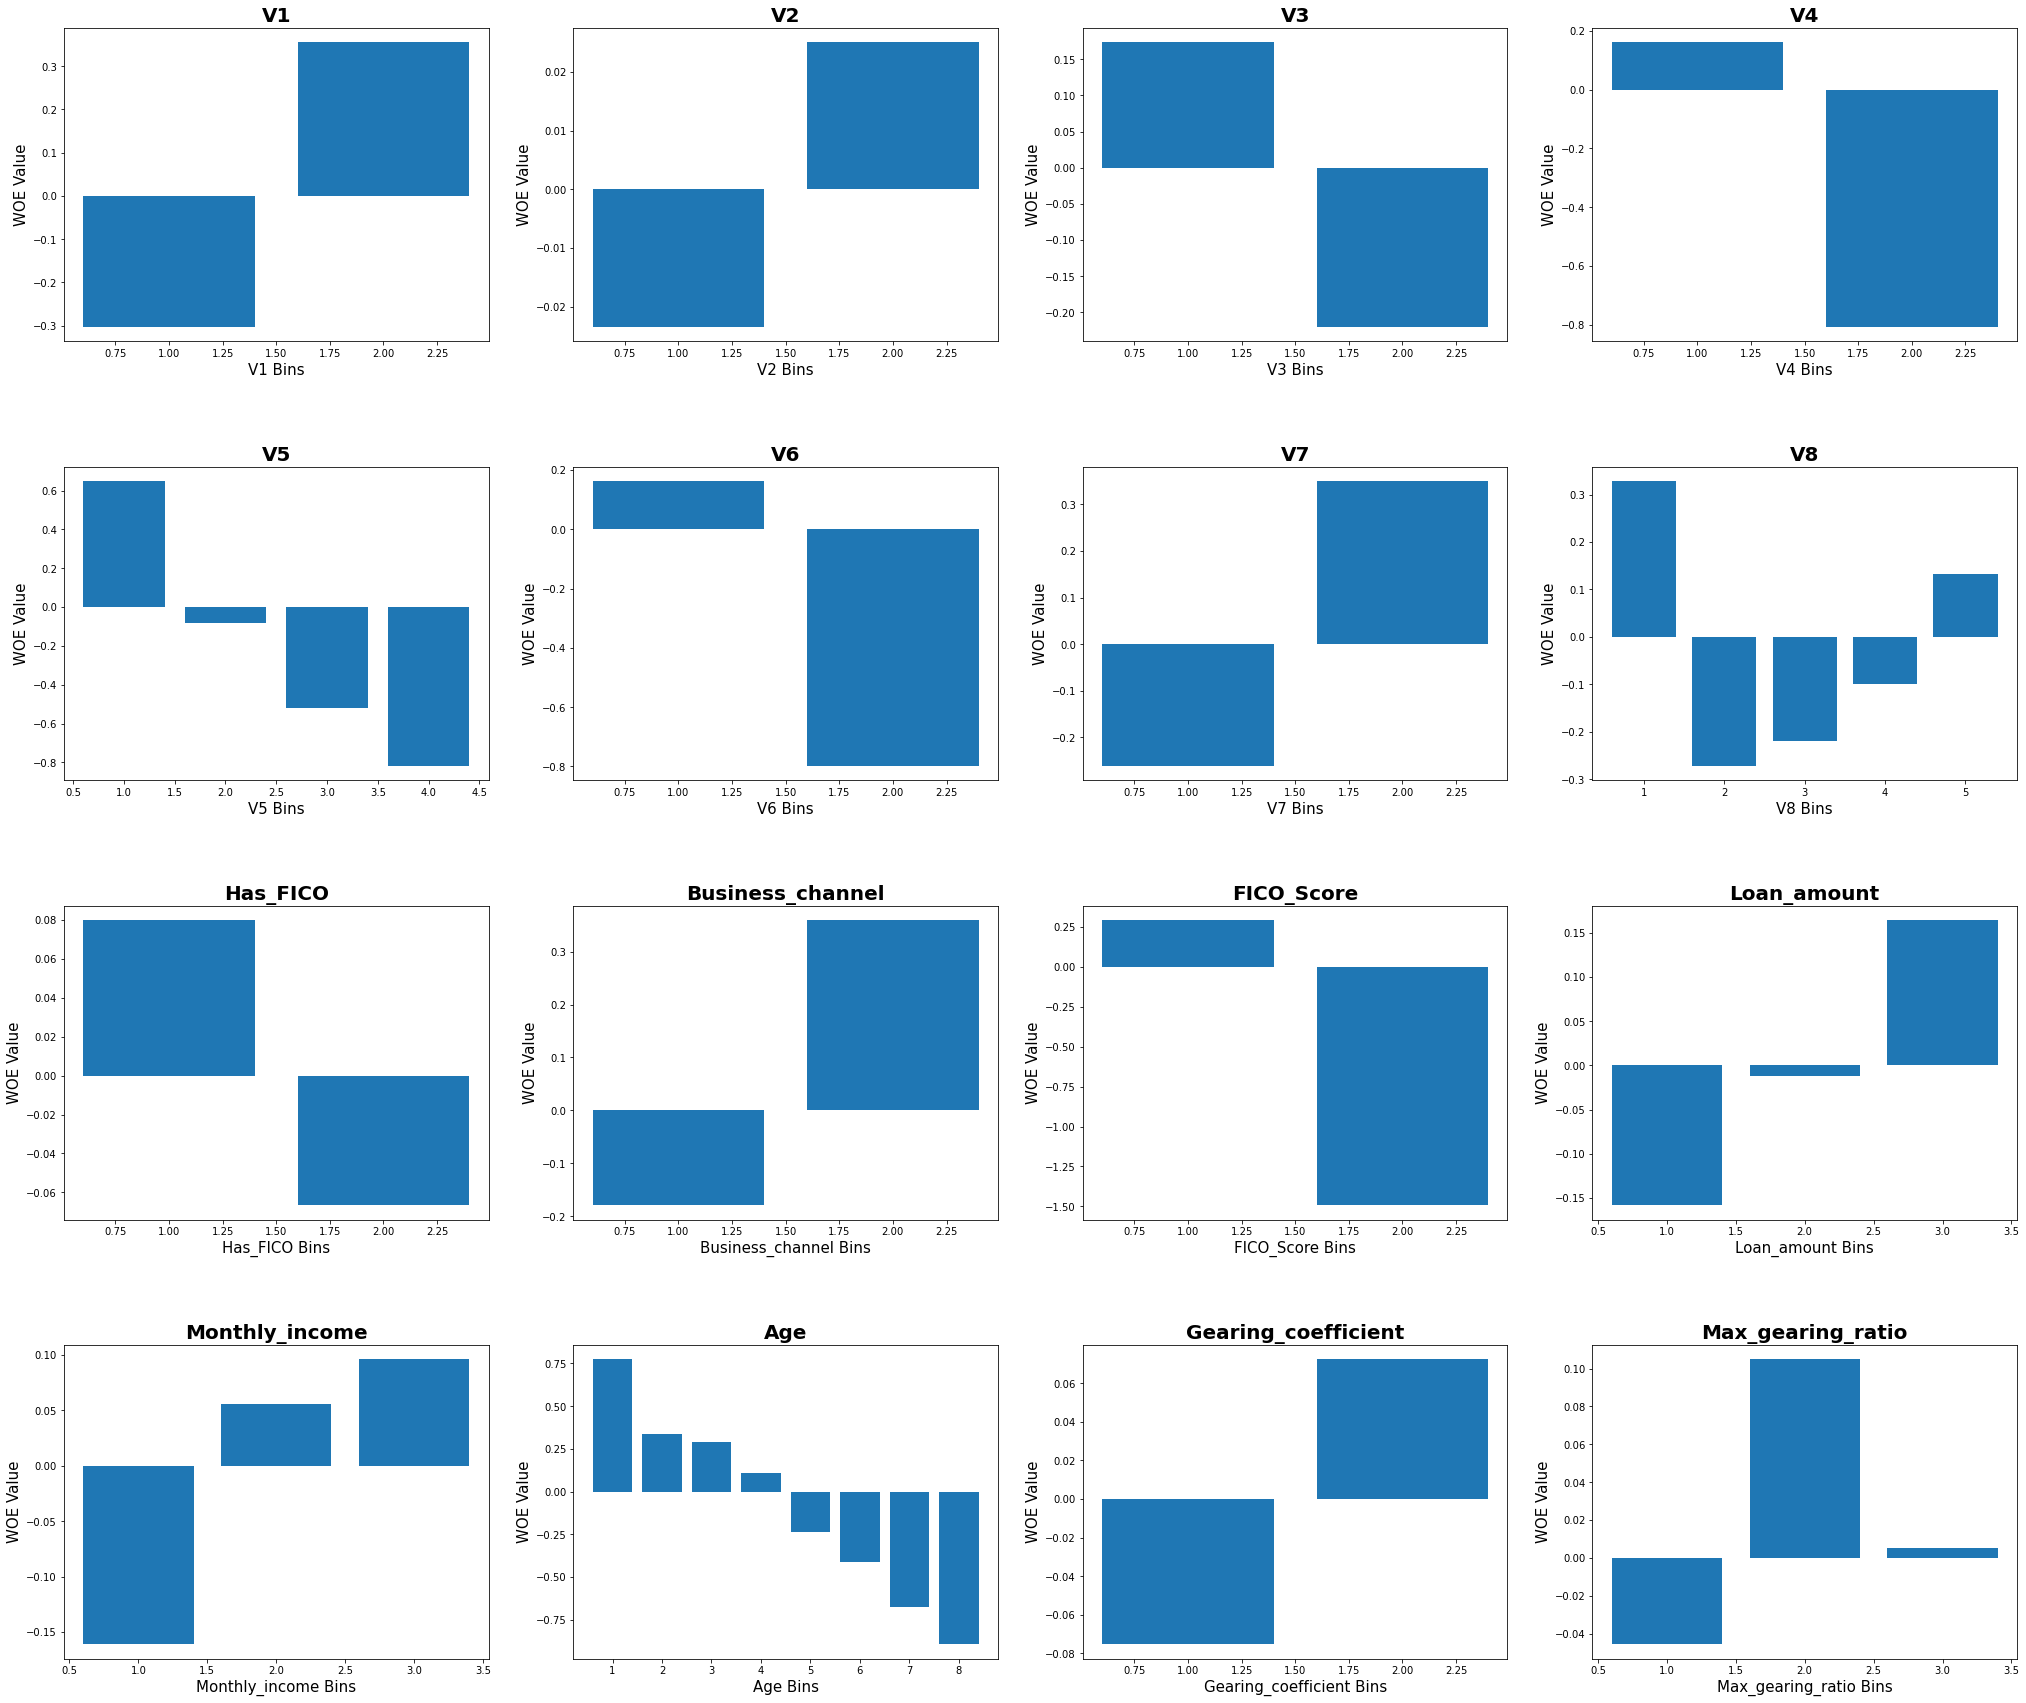

In [24]:
# Plot WoE for all variables
plt.figure(figsize=(35,30))
plt.subplots_adjust(hspace=.4)
name_vars=X_train_pre.columns
j=1
for i in name_vars:
    dat=final_iv[final_iv["VAR_NAME"]==i]
    plt.subplot(4, 4, j)
    plt.bar(x=range(1,(len(dat)+1)),height=dat['WOE'])
    plt.title(f'{i}', fontweight="bold", fontsize=20)
    plt.xlabel(f'{i} Bins', fontsize=15)
    plt.ylabel('WOE Value',fontsize=15)
    j=j+1

The graph above shows how each group influences the target variable. 

Positive values of WOE indicate that this particular group has more good customers (Non-Default) that bad customers (Default), which means that in groups with negative WOE the default risk is higher.

### 3. Credit Risk Modeling  of accepted Clients

We are going to use three classification techniques: Logistic Regression, Random Forest, and Gradient Boosting. 

All variables will be considered except the variable "Days_late". The values of the variable are unknow when evaluating new loan applications, thus won't serve in our model.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

### 3.1. Logistic Regression

In [26]:
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X_train_woe, np.ravel(y_train))

LogisticRegression()

In [27]:
# Making predictions in the valid dataset
proba_log_reg = log_reg.predict_proba(X_valid_woe)
pred_log_reg = pd.DataFrame(proba_log_reg[:,1], columns = ['prob_default'])
pred_log_reg['default_status'] = pred_log_reg['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

We plot the ROC curve of the validation set generated by the Logistic Regression model.

Text(0.5, 1.0, 'ROC Curve Logistic Regresion')

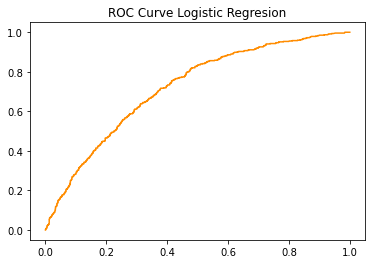

In [28]:
fallout, sensitivity, thresholds = roc_curve(y_valid, pred_log_reg['prob_default'])
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.title('ROC Curve Logistic Regresion')

In [30]:
# We compute the AUC in the validation set
auc_log_reg = roc_auc_score(y_valid,pred_log_reg['prob_default'])
f'AUC_valid= {auc_log_reg}.'

'AUC_valid= 0.7192632682192696.'

In [31]:
# Create metrics evaluation report
targets = ['non_default','default']
print(classification_report(y_valid, pred_log_reg['default_status'], target_names = targets))

              precision    recall  f1-score   support

 non_default       0.78      0.96      0.86      1527
     default       0.51      0.14      0.21       473

    accuracy                           0.77      2000
   macro avg       0.65      0.55      0.54      2000
weighted avg       0.72      0.77      0.71      2000



### 3.2. Random Forest

In [32]:
# Defining random forest model
RFC = RandomForestClassifier()

# Create param grid
RFCParams = {'n_estimators': [150,300,500],'max_features': ['auto', 'sqrt'],'max_depth' : [3,6,9]}

# Create grid search object
cv_RFC = GridSearchCV(RFC,RFCParams, cv=3)

# Fit model 
best_RFC = cv_RFC.fit(X_train_woe, np.ravel(y_train))

In [33]:
# Best Parameters for the Random Forest
best_RFC.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=300)

In [34]:
# Making predictions in the valid dataset
prob_RFC = best_RFC.predict_proba(X_valid_woe)

pred_RFC = pd.DataFrame(prob_RFC[:,1], columns = ['prob_default'])

pred_RFC['default_status'] = pred_RFC['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

We plot the ROC curve of the validation set generated by the Random Forest model.

Text(0.5, 1.0, 'ROC Curve Random Forest')

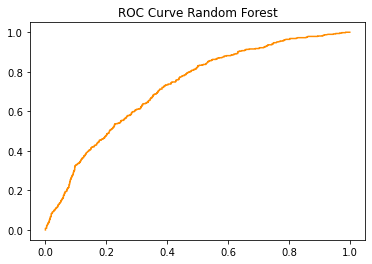

In [35]:
fallout, sensitivity, thresholds = roc_curve(y_valid, pred_RFC['prob_default'])
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.title('ROC Curve Random Forest')

In [36]:
# We compute the AUC in the validation set
auc_RFC = roc_auc_score(y_valid, pred_RFC['prob_default'])
f'AUC_valid = {auc_RFC}.'

'AUC_valid = 0.7226678075126926.'

In [37]:
# Create metrics evaluation report
target = ['non_default','default']
print(classification_report(y_valid, pred_RFC['default_status'], target_names = targets))

              precision    recall  f1-score   support

 non_default       0.78      0.96      0.86      1527
     default       0.47      0.12      0.19       473

    accuracy                           0.76      2000
   macro avg       0.62      0.54      0.52      2000
weighted avg       0.71      0.76      0.70      2000



### 3.3. Gradient Boosting

In [42]:
# Defining Gradient Boosting model
GB = GradientBoostingClassifier()

# Create param grid
GB_Param = {'learning_rate': [0.001,0.01, 0.05, 0.1],'max_features': ['auto', 'sqrt'],'max_depth' : [3,6,9]}

# Create grid search object
CV_GB = GridSearchCV(GB,GB_Param, cv=3)

# Fit model 
best_GB = CV_GB.fit(X_train_woe, np.ravel(y_train))

In [43]:
# Best Parameters for the Gradient Boosting
best_GB.best_estimator_

GradientBoostingClassifier(max_features='sqrt')

In [44]:
# Making predictions in the valid dataset
prob_GB = best_GB.predict_proba(X_valid_woe)
pred_GB = pd.DataFrame(prob_GB[:,1], columns = ['prob_default'])
pred_GB['default_status'] = pred_GB['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

We plot ROC curve of the valid dataset generated by the Gradient Boosting model.

Text(0.5, 1.0, 'ROC Curve Gradient Boosting')

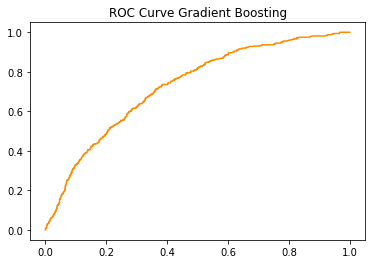

In [45]:
fallout, sensitivity, thresholds = roc_curve(y_valid, pred_GB['prob_default'])
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.title('ROC Curve Gradient Boosting')

In [46]:
# Calculating the AUC in the valid dataset
auc_GB = roc_auc_score(y_valid, pred_GB['prob_default'])
f'AUC_valid= {auc_GB}.'

'AUC_valid= 0.7279684495154867.'

In [47]:
# Create metrics evaluation report
targets = ['non_default','default']
print(classification_report(y_valid, pred_GB['default_status'], target_names = targets))

              precision    recall  f1-score   support

 non_default       0.79      0.94      0.86      1527
     default       0.50      0.19      0.27       473

    accuracy                           0.76      2000
   macro avg       0.64      0.56      0.57      2000
weighted avg       0.72      0.76      0.72      2000



Model conclusion:

Our models have similar performance. However, the Recall in the true default observations shows that all models have a low performance as the the default clients classification is not good enough.

When it comes to credit risk, it is important to classify the default clients well. To fix it, we oversample the train set in order to have a balanced dataset in the target variable (Default_45). Then, we train the models again with the new oversampling dataset and we compare them using the validation set. 

### 3.4. Oversampling

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
# OverSampling with SMOTE
method = SMOTE(sampling_strategy=1) # 50-50 balance

# We apply resampling to the train set only
X_resampled, y_resampled = method.fit_resample(X_train_woe, y_train)

#### Logistic Regression

In [51]:
oversampl_log_reg = LogisticRegression(solver='lbfgs')

In [52]:
oversampl_log_reg.fit(X_resampled, np.ravel(y_resampled))

LogisticRegression()

In [53]:
# Making predictions in the valid dataset
prob_log_reg = oversampl_log_reg.predict_proba(X_valid_woe)
pred_log_reg = pd.DataFrame(prob_log_reg[:,1], columns = ['prob_default'])
pred_log_reg['default_status'] = pred_log_reg['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

Text(0.5, 1.0, 'ROC Curve Logistic Regresion Oversampling')

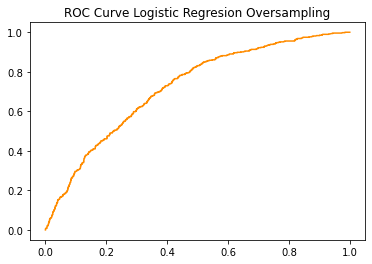

In [54]:
fallout, sensitivity, thresholds = roc_curve(y_valid, pred_log_reg['prob_default'])
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.title('ROC Curve Logistic Regresion Oversampling')

In [55]:
# We calculate the AUC in the valid dataset
auc_log_reg = roc_auc_score(y_valid,pred_log_reg['prob_default'])
f'AUC_valid = {auc_log_reg}.'

'AUC_valid = 0.7202878144076115.'

In [56]:
# Create metrics evaluation report
targets = ['non_default','default']
print(classification_report(y_valid, pred_log_reg['default_status'], target_names = targets))

              precision    recall  f1-score   support

 non_default       0.87      0.63      0.73      1527
     default       0.37      0.70      0.48       473

    accuracy                           0.65      2000
   macro avg       0.62      0.66      0.61      2000
weighted avg       0.75      0.65      0.67      2000



#### Random Forest

In [57]:
# Random forest model
RFC = RandomForestClassifier()

# Create param grid
RFC_Params = {'n_estimators': [150,300,500],'max_features': ['auto', 'sqrt'],'max_depth' : [3,6,9]}

# Create grid search object
CV_RFC = GridSearchCV(RFC,RFC_Params, cv=3)

# Fit model 
best_oversample_RFC = CV_RFC.fit(X_resampled, np.ravel(y_resampled))

In [58]:
# Best Parameters for the Random Forest
best_oversample_RFC.best_estimator_

RandomForestClassifier(max_depth=9, max_features='sqrt', n_estimators=500)

In [59]:
# Making predictions in the valid dataset
prob_RFC = best_oversample_RFC.predict_proba(X_valid_woe)
pred_RFC = pd.DataFrame(prob_RFC[:,1], columns = ['prob_default'])
pred_RFC['default_status'] = pred_RFC['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

Text(0.5, 1.0, 'ROC Curve Random Forest Oversampling')

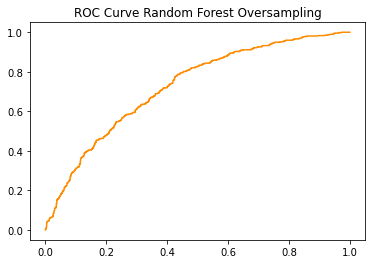

In [60]:
fallout, sensitivity, thresholds = roc_curve(y_valid, pred_RFC['prob_default'])
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.title('ROC Curve Random Forest Oversampling')

In [61]:
# Calculating the AUC in the valid dataset
auc_RFC = roc_auc_score(y_valid,pred_RFC['prob_default'])
f'AUC_valid= {auc_RFC}.'

'AUC_valid= 0.7259338946185019.'

In [62]:
# Create metrics evaluation report
targets=['non_default','default']
print(classification_report(y_valid, pred_RFC['default_status'], target_names=targets))

              precision    recall  f1-score   support

 non_default       0.82      0.84      0.83      1527
     default       0.45      0.41      0.43       473

    accuracy                           0.74      2000
   macro avg       0.64      0.63      0.63      2000
weighted avg       0.73      0.74      0.74      2000



#### Gradient Boosting

In [63]:
# Gradient Boosting model
GB = GradientBoostingClassifier()

# Create param grid
GB_Param = {'learning_rate': [0.001,0.01, 0.05, 0.1],'max_features': ['auto', 'sqrt'],'max_depth' : [3,6,9]}

# Create grid search object
CV_GB = GridSearchCV(GB,GB_Param, cv=3)

# Fit model 
best_oversample_GB = CV_GB.fit(X_resampled, np.ravel(y_resampled))

In [64]:
# Best Parameters for the Gradient Boosting
best_oversample_GB.best_estimator_

GradientBoostingClassifier(max_depth=9, max_features='sqrt')

In [65]:
# Making predictions in the valid dataset
prob_GB = best_oversample_GB.predict_proba(X_valid_woe)
pred_GB = pd.DataFrame(prob_GB[:,1], columns = ['prob_default'])
pred_GB['default_status'] = pred_GB['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

Text(0.5, 1.0, 'ROC Curve Gradient Boosting Oversampling')

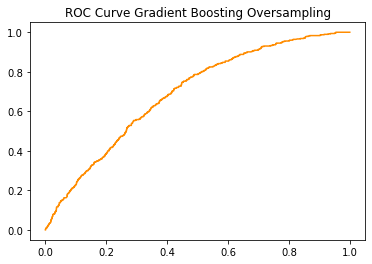

In [66]:
fallout, sensitivity, thresholds = roc_curve(y_valid, pred_GB['prob_default'])
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.title('ROC Curve Gradient Boosting Oversampling')

In [67]:
# We compute the AUC in the valid dataset
auc_GB = roc_auc_score(y_valid,pred_GB['prob_default'])
f'AUC_valid= {auc_GB}.'

'AUC_valid= 0.6893728254353283.'

In [68]:
# Create metrics evaluation report
targets=['non_default','default']
print(classification_report(y_valid, pred_GB['default_status'], target_names=targets))

              precision    recall  f1-score   support

 non_default       0.80      0.88      0.84      1527
     default       0.42      0.27      0.33       473

    accuracy                           0.74      2000
   macro avg       0.61      0.58      0.58      2000
weighted avg       0.71      0.74      0.72      2000



The results of the AUC is not much different.

The Recall and Precision on the other hand show that we classification performs bette for the true default clients. 

We select Logistic Regression of the oversampled train set. This model has a good AUC and the Recall is higher than in the other models. 

In [71]:
variables = X_resampled.columns
variables = pd.DataFrame(variables).rename({0:'variable'}, axis=1)
coef = oversampl_log_reg.coef_[0].tolist()
coef = pd.DataFrame(coef).rename({0:'coef'}, axis=1)
frames = [variables,coef]

In [72]:
df_coef = pd.concat(frames, axis=1)
df_coef

,variable,coef
0,new_Age,0.465912
1,new_Business_channel,1.324508
2,new_FICO_Score,0.897657
3,new_Gearing_coefficient,1.343396
4,new_Has_FICO,-4.076441
5,new_Loan_amount,0.490520
6,new_Max_gearing_ratio,-0.257793
7,new_Monthly_income,0.506475
8,new_V1,0.694037
9,new_V2,1.494350


### 4. Credit Risk Modeling including Rejected Clients

In [73]:
# Reading the reject dataset to train the predictive model
rejects = pd.read_excel("REJECTS.xlsx")

We implement the Logistic Regression model obtained in the previous section to inference the Default label in these applicants. 

Then, the train and validation sets used in the previous section, and the rejection dataset with the predicted default labels can be used to fit a logistic regression model again. Finally, this model will be tested in the test set of the previous section.

We can observe that in this dataset we have the same variables that in the accepted dataset.

In [75]:
rejects.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,Has_FICO,Business_channel,FICO_Score,Loan_amount,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio
0,305932,3,3,14,2,1,5,1,1,1,1,-0.030455,-0.323920,-0.605449,-1.064220,1.028210,-0.768631
1,305764,1,4,7,1,6,4,1,2,1,1,0.715222,5.668368,1.299572,0.807662,1.081778,1.796590
2,305971,1,4,10,4,5,4,1,4,1,3,0.764933,-0.750782,0.434027,-0.390342,-0.969416,1.796590
3,305664,1,5,14,2,2,5,3,3,1,1,-1.347818,-0.852651,-0.490122,-0.989344,1.046303,-0.768631
4,305639,1,4,15,1,5,4,1,3,1,2,1.634890,3.200955,0.561380,0.583036,0.088464,1.796590


In [79]:
# Columns with missing values
null_columns = rejects.columns[rejects.isnull().any()]
null_columns

Index(['FICO_Score'], dtype='object')

In [80]:
# Total missing values in the 'FICO_Score' variable
sum(rejects["FICO_Score"].isnull())

2086

In [81]:
# Number of observations with FICO_Score indicated in the 'Has_FICO' variable
sum(rejects["Has_FICO"]==0)

2086

Like in the accepted dataset we have missing values only in the "FICO_Score" variable. I will replace the missing values for zero.

In [82]:
rejects['FICO_Score'].fillna(0, inplace = True)

Now, I will apply the WOE in the rejected dataset.

In [84]:
X_reject_woe = transf(rejects)

In [85]:
# Keeping only the variables with the WOE value
X_reject_woe = X_reject_woe.loc[:, X_reject_woe.columns.str.contains('new')]

Before applying the Logistic Regression Model in the rejected applicants, we define an acceptance rate. 

This rate will be a threshold to classify a rejected application as Default or Non-Default. We accept only 20% of the rejected applicants for that, which means that the 80% of the rejected clients with a high probability of default would have a default label and the 20% left would have a Non-Default label.

In [89]:
# Making predictions in the rejected dataset
prob_reject_lr = oversampl_log_reg.predict_proba(X_reject_woe)
pred_reject_lr = pd.DataFrame(prob_reject_lr[:,1], columns = ['prob_default'])

In [90]:
# Defining the threshold for an acceptance rate of 20%
threshold = np.quantile(prob_reject_lr, 0.20)
threshold

0.2922223271705323

In [91]:
# Adding the predicted default status 
pred_reject_lr['Default_45'] = pred_reject_lr['prob_default'].apply(lambda x: 1 if x > threshold else 0)

Now, we can combine the training, valid, and reject datasets. Then, we will calculate a new WOE and training again a Logistic Regression Model.

In [93]:
# We combine train set, validation set and reject dataset to build a new logistic model
y_reject = pred_reject_lr[["Default_45"]]
df_y = [y_train,y_valid,y_reject]
y_inference = pd.concat(df_y,axis=0)
X_train = X_train.iloc[:,0:17]
X_valid = X_valid.iloc[:,0:17]
X_reject = rejects.iloc[:,0:17]
df_X = [X_train,X_valid,X_reject]
X_inference = pd.concat(df_X,axis=0)

In [94]:
# We apply the WOE and IV in the train set
X_inference_pre = X_inference.drop('ID', axis=1)
final_iv, IV = data_vars(X_inference_pre,y_inference.Default_45)

In [95]:
# We apply the new WOE in the new X_train and X_test datasets
X_test = X_test.iloc[:,0:17]
transform_vars_list = X_inference.columns.difference(['ID'])
transform_prefix = 'new_'

In [96]:
X_inference_woe = transf(X_inference)
X_test_woe = transf(X_test)

In [97]:
# We keep only the variables with the WOE value
X_inference_woe = X_inference_woe.loc[:, X_inference_woe.columns.str.contains('new')]
X_test_woe = X_test_woe.loc[:, X_test_woe.columns.str.contains('new')]

In [98]:
# Train a Logistic Regression over the X_inference dataset
lr_inf = LogisticRegression(solver='lbfgs')
lr_inf.fit(X_inference_woe, np.ravel(y_inference))

LogisticRegression()

In [100]:
# Making predictions in the test set
prob_lr_inf = lr_inf.predict_proba(X_test_woe)
pred_lr_inf = pd.DataFrame(prob_lr_inf[:,1], columns = ['prob_default'])
pred_lr_inf['default_status'] = pred_lr_inf['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

Text(0.5, 1.0, 'ROC Curve Logistic Regresion inference data')

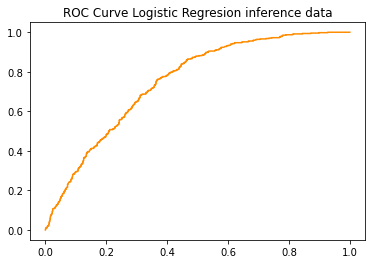

In [101]:
fallout, sensitivity, thresholds = roc_curve(y_test, pred_lr_inf['prob_default'])
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.title('ROC Curve Logistic Regresion inference data')

In [102]:
# We compute the AUC in the test set
auc_lr_inf = roc_auc_score(y_test,pred_lr_inf['prob_default'])
f'AUC_valid= {auc_lr_inf}.'

'AUC_valid= 0.7494548445112706.'

In [103]:
# Create metrics evaluation report
targets=['non_default','default']
print(classification_report(y_test, pred_lr_inf['default_status'], target_names=targets))

              precision    recall  f1-score   support

 non_default       0.89      0.64      0.74      1527
     default       0.39      0.74      0.51       473

    accuracy                           0.66      2000
   macro avg       0.64      0.69      0.63      2000
weighted avg       0.77      0.66      0.69      2000



The performance in the new model has improved. All metrics, AUC, Precision and Recall are higher than in the previous model. The coefficients associated with the model are

In [104]:
variables = X_inference_woe.columns
variables = pd.DataFrame(variables).rename({0:'variable'}, axis=1)
coef = lr_inf.coef_[0].tolist()
coef = pd.DataFrame(coef).rename({0:'coef'}, axis=1)
frames = [variables,coef]
df_coef_inf = pd.concat(frames, axis=1)
df_coef_inf

,variable,coef
0,new_Age,0.168345
1,new_Business_channel,-2.442765
2,new_FICO_Score,0.861036
3,new_Gearing_coefficient,-0.659364
4,new_Has_FICO,-0.184918
5,new_Loan_amount,-0.985301
6,new_Max_gearing_ratio,-0.764439
7,new_Monthly_income,1.373003
8,new_V1,0.456338
9,new_V2,1.368330


The variables with negative coefficients indicate that the higher the value of the predictive variable, the lower is the probability of default. In contrast, the variables with positive coefficients indicate that the higher the value of the predictor variable, the higher is the probability of default.

### 5. Credit Scorecard 

Now that we have the logistic model to predict the probability of default, one can construct a credit scorecard. A credit scorecard represents the creditworthiness of an applicant. The next formula will be used for estimating the scorecard points, it has to be used in each independent variable Xi:

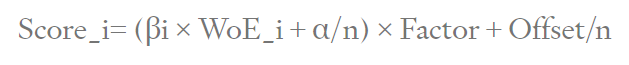

Where:

$\beta_{i}$ = logistic regression coefficient for the variable $X_{i}$\
$\alpha =$ logistic regression intercept\
$WoE=$  Weight of Evidence value for variable $X_{i}$\
$n=$ number of independent variables $X_{i}$ in the model\
$Factor=$ pdo/ln(2)\
$Offset$= Target Score — (Factor × $ln$(Target Odds))

I will choose to have a target score of 600 to mean a 50 to 1 odds of good customer to bad, and an increase of 20 means a doubling odds. 

In [105]:
df_coef_inf['var'] = df_coef_inf['variable'].apply(lambda x: x.split("new_")[1])
scorecard = final_iv[["VAR_NAME","MIN_VALUE","MAX_VALUE","WOE"]]
scorecard = pd.merge(scorecard,df_coef_inf,how="inner",left_on='VAR_NAME',right_on='var').drop(["variable","var"], axis=1)

In [106]:
alpha = lr_inf.intercept_[0]
score_df = pd.DataFrame(columns=["score"])
for i in list(range(len(scorecard))):
    score =(((scorecard.iloc[i, 4])*(scorecard.iloc[i, 3]))+(alpha/16))*(20/np.log(2)) + (600-((20/np.log(2))*np.log(50)))/16
    score_df = score_df.append({"score": score},ignore_index =True)

In [107]:
frames = [scorecard,score_df]
scorecard = pd.concat(frames,axis=1)

In [108]:
scorecard = scorecard.drop(["WOE","coef"],axis=1)

The next table shows the scorecard points given to each applicant according to their characteristics. Base on the total sum of points given to each client and the cut off determine by the bank, one can decide if accept a new loan application.

In [109]:
scorecard

,VAR_NAME,MIN_VALUE,MAX_VALUE,score
0,V1,1,1,25.632602
1,V1,2,5,35.320191
2,V2,1,3,26.787170
3,V2,4,6,32.851950
4,V3,1,10,32.759265
5,V3,11,15,25.572882
6,V4,1,4,29.295869
7,V4,5,6,32.525919
8,V5,1,2,46.512440
9,V5,3,3,34.623539


### References

* https://blogs.sas.com/content/subconsciousmusings/2019/01/18/building-credit-scorecards-using-statistical-methods-and-business-logic/#prettyPhoto
* https://github.com/Sundar0989/WOE-and-IV/blob/master/WOE_IV.ipynb 
* https://towardsdatascience.com/intro-to-credit-scorecard-9afeaaa3725f
